<center><b><font size = "4">Supply Chain Analytics to Predict the on Time Delivery of the Products </font></b></center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCTION</a></span></li><li><span><a href="#GOALS-AND-OBJECTIVES" data-toc-modified-id="GOALS-AND-OBJECTIVES-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GOALS AND OBJECTIVES</a></span></li><li><span><a href="#DATA-CLEANING-AND-PRE-PROCESSING" data-toc-modified-id="DATA-CLEANING-AND-PRE-PROCESSING-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA CLEANING AND PRE-PROCESSING</a></span><ul class="toc-item"><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importing Data</a></span></li></ul></li><li><span><a href="#DATA-EXPLORATION" data-toc-modified-id="DATA-EXPLORATION-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DATA EXPLORATION</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration-using-Univariate-Plots" data-toc-modified-id="Data-Exploration-using-Univariate-Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Exploration using Univariate Plots</a></span></li><li><span><a href="#Data-Exploration-using-Bivariate-Plots" data-toc-modified-id="Data-Exploration-using-Bivariate-Plots-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Exploration using Bivariate Plots</a></span></li><li><span><a href="#Data-Exploration-using-Trivariate-Plots" data-toc-modified-id="Data-Exploration-using-Trivariate-Plots-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Data Exploration using Trivariate Plots</a></span></li></ul></li><li><span><a href="#SUMMARY-AND-CONCLUSION" data-toc-modified-id="SUMMARY-AND-CONCLUSION-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SUMMARY AND CONCLUSION</a></span></li><li><span><a href="#REFERENCES" data-toc-modified-id="REFERENCES-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>REFERENCES</a></span></li></ul></div>

# INTRODUCTION
In any E-Commerce business, it is necessary for the products to be delivered on time. This marks one of the criterias of customer satisfaction and the ratings given by the customer for the company. The delivery time of a product depends on the block of Warehouse from where the product leaves to the mode of  transportation depending on the importance of the product.

In this report we have used an E-Commerece Shipping data of an International company, that sells electronic products and is interested in the key insights from their customer database(Kaggle,2021). 
The dataset can be accessed from [here](https://www.kaggle.com/prachi13/customer-analytics) which contains 12 feaures and 11000 observations.<br>
The features of the dataset are as follows:


| Feature Name | Data Type | Units | Description |
| --- | --- | --- |--- |
| ID | Integer | NA | NA | ID Number of Customers |
| Warehouse block | Nominal | NA | The Company has big Warehouse which is divided in to block such as A,B,C,D,E. |
| Mode of shipment | Nominal | NA | The Company Ships the products in multiple way such as Ship, Flight and Road. |
| Customer care calls | Interger | NA | The number of calls made from enquiry for enquiry of the shipment. |
| Customer rating | Interger | NA | The company has rated from every customer. 1 is the lowest, 5 is the highest (Best)|
| Cost of the product | Interger  | U.S Dollar  | Cost of the Product in US Dollars |
| Prior purchases | Interger  | NA | The Number of Prior Purchase |
| Product importance | Ordinal | NA | The company has categorized the product in the various parameter such as low, medium, high |
| Gender | Nominal | NA | Male and Female |
| Discount offered | Interger | U.S. Dollar | Discount offered on that specific product. |
| Weight in gms | Interger | Grams | It is the weight in grams |
| Reached on time | Interger | NA | It is the target variable, where 1 Indicates that the product has not reached on time and 0 indicates it has reached on time |

The report contains visualizations of various features and their correlations between them with the target variable being `Reached_on_Time` for the analysis and modelling. We will be using these features to predict if the products would reach on time or not.


# GOALS AND OBJECTIVES
As part of Supply Chain Analytics, the goal is to analyze the current product data and  model various algorithms that would help to predict if the products reach on time using various predictors from the E-Commerce dataset.

# DATA CLEANING AND PRE-PROCESSING
In this section we commence with data preprocessing steps and checks required for our analysis and modelling.

## Importing Data
We import the `Pandas` package which is required for using the `read_csv()` function to read the dataset into the environment along with `seaborn` and `matplotlib.pyplot` package for creating visualizations and finally `numpy` package for with arrays , as follows:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import os

In [13]:
#Import data
prod_info = pd.read_csv('Warehouse.csv')

#Display the first 5 rows of the dataset
prod_info.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


From above we can see that the data has been successfully imported.

Since we do not require the `ID` column , we deop that coulmn using the `drop()` function.Also, we rename the `Reached.on.Time_Y.N` coulmn to `Reached_On_Time`

In [14]:
prod_info.drop(['ID'],axis=1,inplace=True)
clean_data = prod_info.rename(columns={"Reached.on.Time_Y.N": "Reached_On_Time"})

We print out the new data with the first 5 rows

In [15]:
clean_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_On_Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


We now check the summary of the data using the `info()` function as below.

In [16]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Reached_On_Time        10999 non-null int64
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


From the above results it can be seen that there are a total of 4 categorical variables and 7 integer variables.<br>
Also the dataset does not have any null values, hence we need not any further data cleaning and moving on to Data Exploration


# DATA EXPLORATION

We will start the data exploration with the One Variable Plots.

## Data Exploration using Univariate Plots

**1)** We will explore the frequency of `Customer rating` column using a pie chart.

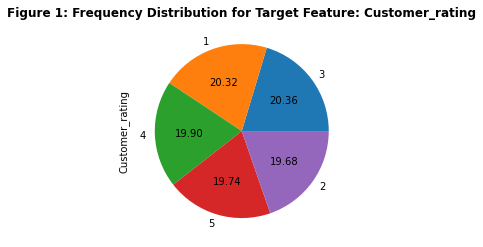

In [80]:
#plot pie chart for target feature
Customer_rating = clean_data['Customer_rating'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("Figure 1: Frequency Distribution for Target Feature: Customer_rating", fontweight='bold')
plt.show()

As seen in the above bar graph there is no imbalance in the frequencies. They are almost similar values with rating 1 accounting for 20.32% , rating 2 accounting for 19.68% and the other values are quite close to these values. 
This means that none of the products earned a higher customer rating as compared to other products.

**2)** We will explore the `Reached on Time` column.

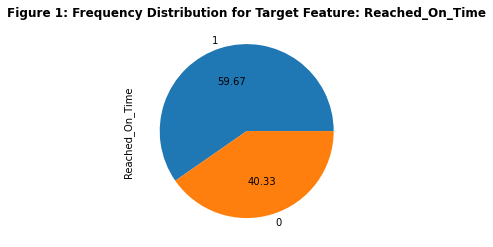

In [65]:
#plot pie chart for target feature
Reached_On_Time = clean_data['Reached_On_Time'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("Figure 1: Frequency Distribution for Target Feature: Reached_On_Time",fontweight='bold')
plt.show()

As seen in the above pie chart around 60% of the products `Reached On Time` while 40% did not. 

**3)** We will explore the `Warehouse Block` column for its frequency.

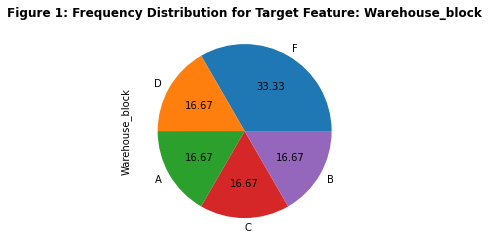

In [64]:
#plot pie chart for target feature
Warehouse_block = clean_data['Warehouse_block'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title("Figure 1: Frequency Distribution for Target Feature: Warehouse_block",fontweight='bold')
plt.show()

The above pie chart shows that the products that were shipped from Block F covers the maximum amount of 33% while the rest of the blocks makes up around 17% per block.

## Data Exploration using Bivariate Plots


In this section we will analyze and visualizw 2 variable plots 

**1)** In this plot we will be exploring `Mode of Shipment` and `Count of Products`

Text(0.5, 1.0, 'Product Shipment Based on Product Importance')

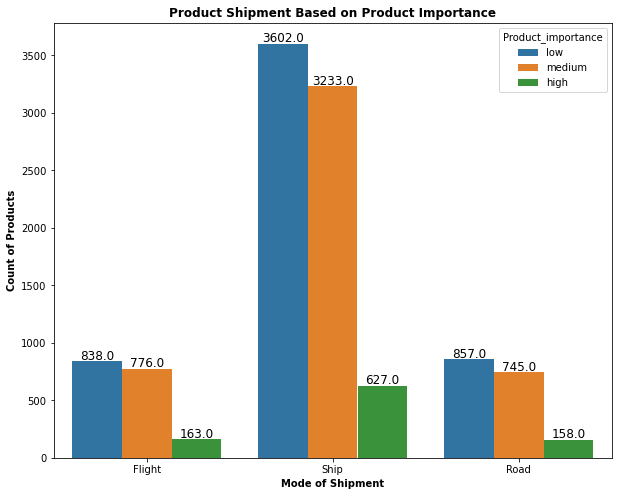

In [67]:
plt.figure(figsize=(10, 8))
b=sns.countplot(x='Mode_of_Shipment', hue= 'Product_importance',data=clean_data)
for p in b.patches:
    b.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Mode of Shipment",fontweight='bold')
plt.ylabel("Count of Products",fontweight='bold')
plt.title("Product Shipment Based on Product Importance",fontweight='bold')

The above bar chart shows Product Shipment Based on `Product Importance`. It is observed that shipping the product was a popular mode of shipment rather than Flight and Road for all products with low,medium and high importance.The popularity of `Flight` and `Road` was almost similar.

**2)** In this plot we will explor the `Customer rating` and `Product Importance`

Text(0.5, 1.0, 'Customer Rating Based on Product Importance')

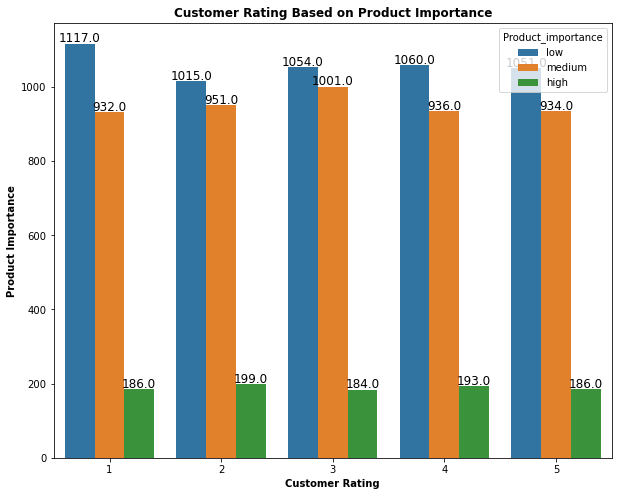

In [68]:
plt.figure(figsize=(10, 8))
b=sns.countplot(x='Customer_rating', hue= 'Product_importance',data=clean_data)
for p in b.patches:
    b.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Customer Rating",fontweight='bold')
plt.ylabel("Product Importance",fontweight='bold')
plt.title("Customer Rating Based on Product Importance",fontweight='bold')

The above bar chart shows the customer rating provided for products with different levels of importance. The product with low level of importance have received higher ratings rather than the product with medium and high importance.

**3)** In this plot we will explore the `Product Importance` and `Reached on Time` variables  

Text(0.5, 1.0, 'Product importance Based on Reached On Time')

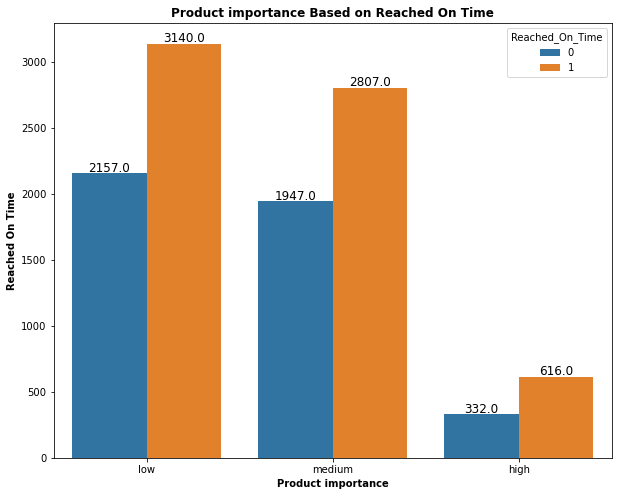

In [69]:
plt.figure(figsize=(10, 8))
b=sns.countplot(x='Product_importance', hue= 'Reached_On_Time',data=clean_data)
for p in b.patches:
    b.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Product importance",fontweight='bold')
plt.ylabel("Reached On Time",fontweight='bold')
plt.title("Product importance Based on Reached On Time",fontweight='bold')

The above bar chart shows that the products witl low level of importance reached the customers on time rather thah the ones with medium and high importance.

## Data Exploration using Trivariate Plots

In this section we will analyze and visualize 3 variable plots

**1)** In this plot we will plot the `Cost of the Product` , `Customer rating` and `Gender` column.

Text(0.5, 1.0, 'Gender wise trend of Customer Rating based on Cost of Product')

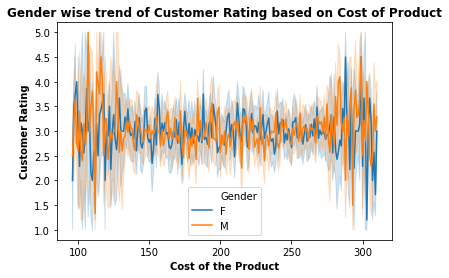

In [53]:
plt.figure(figsize=(6, 4))
c = sns.lineplot(y=clean_data.Customer_rating, x=clean_data.Cost_of_the_Product, hue=clean_data.Gender)

for p in c.patches:
    c.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xlabel('Cost of the Product', fontweight='bold')
plt.ylabel('Customer Rating',fontweight='bold')
plt.title('Gender wise trend of Customer Rating based on Cost of Product', fontweight='bold')

The above line graph shows that the products that have extreme high or low cost have high variability in variance compared to the ones in the middle range

**2)** In this plot we will explore the `Warehouse` , `Mode of Transport ` and `Weight in gms` of the product

For this visualization we will create masks for `Flight`, `Ship` and `Road` transport

In [57]:
# Mask for Flight Transport
Flight_mask=clean_data[clean_data["Mode_of_Shipment"]=='Flight']
Flight_Bar=[Flight_mask[Flight_mask["Warehouse_block"]=="A"]['Weight_in_gms'].sum(),
       Flight_mask[Flight_mask["Warehouse_block"]=="B"]['Weight_in_gms'].sum(),
       Flight_mask[Flight_mask["Warehouse_block"]=="C"]['Weight_in_gms'].sum(),
       Flight_mask[Flight_mask["Warehouse_block"]=="D"]['Weight_in_gms'].sum(),
       Flight_mask[Flight_mask["Warehouse_block"]=="F"]['Weight_in_gms'].sum()]

In [58]:
# Mask for Ship Transport
Ship_mask=clean_data[clean_data["Mode_of_Shipment"]=='Ship']
Ship_Bar=[Ship_mask[Ship_mask["Warehouse_block"]=="A"]['Weight_in_gms'].sum(),
       Ship_mask[Ship_mask["Warehouse_block"]=="B"]['Weight_in_gms'].sum(),
       Ship_mask[Ship_mask["Warehouse_block"]=="C"]['Weight_in_gms'].sum(),
       Ship_mask[Ship_mask["Warehouse_block"]=="D"]['Weight_in_gms'].sum(),
       Ship_mask[Ship_mask["Warehouse_block"]=="F"]['Weight_in_gms'].sum()]


In [33]:
# Mask for Road Transport
Road_mask=clean_data[clean_data["Mode_of_Shipment"]=='Road']
Road_Bar=[Ship_mask[Ship_mask["Warehouse_block"]=="A"]['Weight_in_gms'].sum(),
       Road_mask[Road_mask["Warehouse_block"]=="B"]['Weight_in_gms'].sum(),
       Road_mask[Road_mask["Warehouse_block"]=="C"]['Weight_in_gms'].sum(),
       Road_mask[Road_mask["Warehouse_block"]=="D"]['Weight_in_gms'].sum(),
       Road_mask[Road_mask["Warehouse_block"]=="F"]['Weight_in_gms'].sum()]


We will create barwidrth and arrange each bar 0.25 units apart

In [59]:
barWidth = 0.25
r1 = np.arange(len(Flight_Bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

Plotting the bar graph

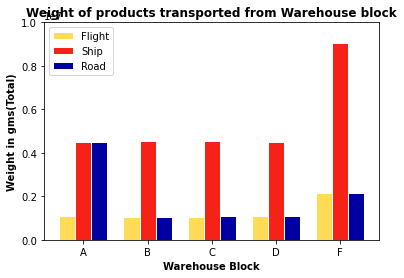

<Figure size 864x720 with 0 Axes>

In [63]:
plt.ylim(0,+10000000)
plt.xlabel('Warehouse Block', fontweight='bold')
plt.title('Weight of products transported from Warehouse block', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Flight_Bar))], ['A', 'B', 'C','D','F'])
plt.bar(r1, Flight_Bar, color='#FFDB58', width=barWidth, edgecolor='white', label='Flight')
plt.bar(r2, Ship_Bar, color='#F62217', width=barWidth, edgecolor='white', label='Ship')
plt.bar(r3, Road_Bar, color='#0000A0', width=barWidth, edgecolor='white', label='Road')
plt.ylabel("Weight in gms(Total)",fontweight='bold')
plt.legend()
plt.figure(figsize=(12,10))

plt.show()



The above bar graph shows that the product with heavier weight were moved from all the warehouse blocks using the Ship mode of transport

**3)** In this plot we will explore `Product Importance` with the `Cost of the Products` based on `Reached on Time` variable

For this we will create masks for Reached on time variable

In [35]:
#Creating mask for reached on time
OnTime_mask=clean_data[clean_data["Reached_On_Time"]==0]
OnTime_importance=[OnTime_mask[OnTime_mask["Product_importance"]=='low']["Cost_of_the_Product"].sum(),
               OnTime_mask[OnTime_mask["Product_importance"]=='medium']["Cost_of_the_Product"].sum(),
               OnTime_mask[OnTime_mask["Product_importance"]=='high']["Cost_of_the_Product"].sum()]

In [42]:
#Creating mask for not reached on time
NotOnTime_mask=clean_data[clean_data['Reached_On_Time']==1]
NotOnTime_importance=[NotOnTime_mask[NotOnTime_mask["Product_importance"]=='low']["Cost_of_the_Product"].sum(),
               NotOnTime_mask[NotOnTime_mask["Product_importance"]=='medium']["Cost_of_the_Product"].sum(),
               NotOnTime_mask[NotOnTime_mask["Product_importance"]=='high']["Cost_of_the_Product"].sum()]

We will create barwidrth and arrange each bar 0.25 units apart

In [37]:
barWidth = 0.25
r1 = np.arange(len(NotOnTime_importance))
r2 = [x + barWidth for x in r1]

Plotting the bargraph

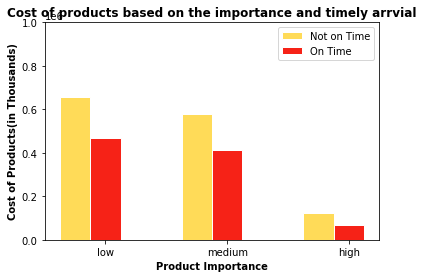

<Figure size 864x720 with 0 Axes>

In [84]:
plt.ylim(0,+1000000)
plt.xlabel('Product Importance', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(NotOnTime_importance))], ['low','medium','high'])
plt.bar(r1, NotOnTime_importance, color='#FFDB58', width=barWidth, edgecolor='white', label='Not on Time')
plt.bar(r2, OnTime_importance, color='#F62217', width=barWidth, edgecolor='white', label='On Time')
plt.ylabel("Cost of Products(in Thousands)",fontweight='bold')
plt.title('Cost of products based on the importance and timely arrvial', fontweight='bold')
plt.legend()
plt.figure(figsize=(12,10))
plt.show()

The above bar graph shows that for any of the products that had a higher cost, the products did not reach on time.

**4)** In this plot we will explore the `Product Importance` and `Prior Purchase` based on `Gender`

For this we will create masks for `Gender` variable

In [41]:
#Creating female mask
Female_mask=clean_data[clean_data['Gender']=='F']
Female_importance=[Female_mask[Female_mask["Product_importance"]=='low']["Prior_purchases"].sum(),
               Female_mask[Female_mask["Product_importance"]=='medium']["Prior_purchases"].sum(),
               Female_mask[Female_mask["Product_importance"]=='high']["Prior_purchases"].sum()]

In [40]:
#Creating male mask
Male_mask=clean_data[clean_data['Gender']=='M']
Male_importance=[Male_mask[Male_mask["Product_importance"]=='low']["Prior_purchases"].sum(),
               Male_mask[Male_mask["Product_importance"]=='medium']["Prior_purchases"].sum(),
               Male_mask[Male_mask["Product_importance"]=='high']["Prior_purchases"].sum()]

We will create barwidrth and arrange each bar 0.25 units apart

In [71]:
barWidth = 0.25
r1 = np.arange(len(Male_importance))
r2 = [x + barWidth for x in r1]

Plotting the bargraph

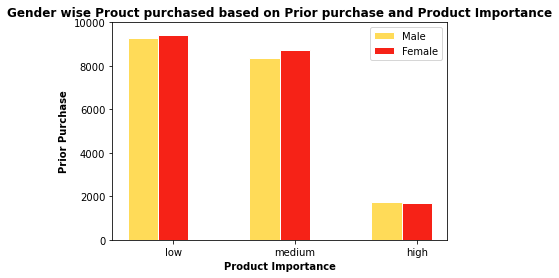

<Figure size 864x720 with 0 Axes>

In [73]:
plt.ylim(0,+10000)
plt.xlabel('Product Importance', fontweight='bold')
plt.title('Gender wise Prouct purchased based on Prior purchase and Product Importance',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Male_importance))], ['low','medium','high'])
plt.bar(r1, Male_importance, color='#FFDB58', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, Female_importance, color='#F62217', width=barWidth, edgecolor='white', label='Female')
plt.ylabel("Prior Purchase",fontweight='bold')
plt.legend()
plt.figure(figsize=(12,10))
plt.show()

For any of the products with low , medium importance if the prior purchases by the female population was higher but for the high importance products it was similar among the male and female populations

**5)** Plotting head map to visualize the correlation between the variables

This can be using the `heatmap()` function from the seaborn package

C:\Users\Honey\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Heat Map of Correlation between different features')

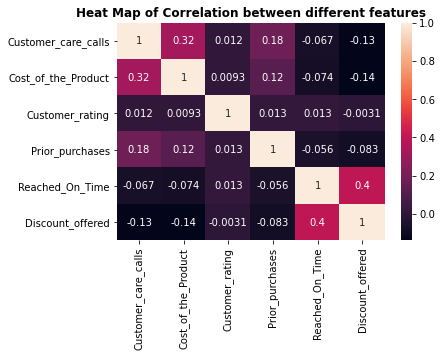

In [79]:
f = (clean_data.loc[:, ['Customer_care_calls', 'Cost_of_the_Product', 'Customer_rating', 'Prior_purchases', 'Reached_On_Time','Discount_offered']]).corr()
sns.heatmap(f, annot=True)
ax = plt.axes()
ax.set_title('Heat Map of Correlation between different features', fontweight='bold')

From the plot it can be seen that the highest correlation is among the `Discount_offered` and `Reached_on Time` 

# SUMMARY AND CONCLUSION

From the exploratory analysis it can be observed that there exists a significant correlation between the `Discount Offered` and the `Reached on Time` variables. Also,  most of the heavy weight products were shipped from the F block of the Warehouse in which the high cost products failed to reach on time and had low importance hence explaining customers rating the company lowest for low importance products.

We can conclude that the company needs to focus on delivering the low and high cost products on time as there is a high variability in customer ratings, especially the low cost products needs to be priortised as those products are bought more often by the customers which can be observed from  (Product Importance vs Prior Purchase based on Gender) graph.

# REFERENCES

Prachi Gopalani(2021).<i>E-Commerce Shipping Data Product Shipment Delivered on time or not? To Meet E-Commerce Customer Demand.</i>
https://www.kaggle.com/prachi13/customer-analytics